# How to deal with the massive negative values in the data?
# Am I not supposed to hand in my code?
# Why does intensity have negative values?
# How am I supposed to see the cities based on the intensity/contour plots?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [17]:
#use code from lab instructions:

import struct# for reading binary files...
f = open('N46E006.hgt','rb')
w = np.zeros([1201,1201])
n=0
for i in range(1201):
    for j in range(1201):
        buf = f.read(2)# read two bytes
        w[i,j] = struct.unpack('>h', buf)[0] # ">h" is a signed two-byte integer
        if(struct.unpack('>h', buf)[0] < 0):
            w[i,j] = w[i-1,j-1]
f.close()

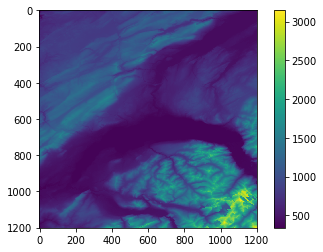

In [18]:
plt.imshow(w)
plt.colorbar()
#plt.xticks(np.arange(0, 1201, 240),[6. , 6.2, 6.4, 6.6, 6.8])
#plt.yticks(np.arange(0, 1201, 240),[46. , 46.2, 46.4, 46.6, 46.8])
#plt.xlabel("Longtitude (E)")
#plt.ylabel("Latitude (N)")

In [19]:
grad_w = np.zeros([1201,1201,2]) #need to have R2 vector gradient at each point
h = 420 #distance between grid points, units of m

#populating the gradient array:
for i in range(1201):
    for j in range(1201):
        
        #first, get gradient for non-boundary points:
        if(i*j!=0 and i!=1200 and j!=1200): 
            grad_w[i,j,0] = (w[i+1,j] - w[i-1,j])/(2*h) #central differences
            grad_w[i,j,1] = (w[i,j+1] - w[i,j-1])/(2*h)
            
        #now, define the gradient for each boundary corner:    
        if(i==0 and j==0): #North West boundary point
            grad_w[i,j,0] = (w[i+1,j] - w[i,j])/(h) #forward differences
            grad_w[i,j,1] = (w[i,j+1] - w[i,j])/(h) #forward differences
        elif(i==0 and j==1200): #North East boundary
            grad_w[i,j,0] = (w[i+1,j] - w[i,j])/(h) #forward differences
            grad_w[i,j,1] = (w[i,j] - w[i,j-1])/(h) #backward differences
        elif(i==1200 and j==0): #South West boundary
            grad_w[i,j,0] = (w[i,j] - w[i-1,j])/(h) #backward differences
            grad_w[i,j,1] = (w[i,j+1] - w[i,j])/(h) #forward differences
        elif(i==1200 and j==1200): #South East boundary
            grad_w[i,j,0] = (w[i,j] - w[i-1,j])/(h) #backward differences
            grad_w[i,j,1] = (w[i,j] - w[i,j-1])/(h) #backward differences
        
        #now, define the gradient for boundary walls
        elif(i==0): #North side
            grad_w[i,j,0] = (w[i+1,j] - w[i,j])/(h) #forward differences
            grad_w[i,j,1] = (w[i,j+1] - w[i,j-1])/(2*h) #central differences
            
        elif(i==1200): #North side
            grad_w[i,j,0] = (w[i,j] - w[i-1,j])/(h) #backward differences
            grad_w[i,j,1] = (w[i,j+1] - w[i,j-1])/(2*h) #central differences

        elif(j==0): #North side
            grad_w[i,j,0] = (w[i+1,j] - w[i-1,j])/(2*h) #central differences
            grad_w[i,j,1] = (w[i,j+1] - w[i,j])/(h) #forward differences
            
        elif(j==1200): #North side
            grad_w[i,j,0] = (w[i+1,j] - w[i-1,j])/(2*h) #central differences
            grad_w[i,j,1] = (w[i,j] - w[i,j-1])/(h) #backward differences

In [44]:
#Get intensity array:

phi = -5*np.pi/6
numerator = - (np.cos(phi)*grad_w[:,:,0] + np.sin(phi)*grad_w[:,:,1])
denominator = np.sqrt(grad_w[:,:,0]**2 + grad_w[:,:,1]**2 + 1)
I = numerator/denominator

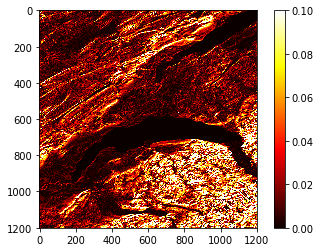

In [45]:
plt.imshow(I, cmap="hot", vmin=0,vmax=0.1)
plt.colorbar()
plt.savefig("Q3_Intensity.PDF")